{'0': 504, '1': 496}


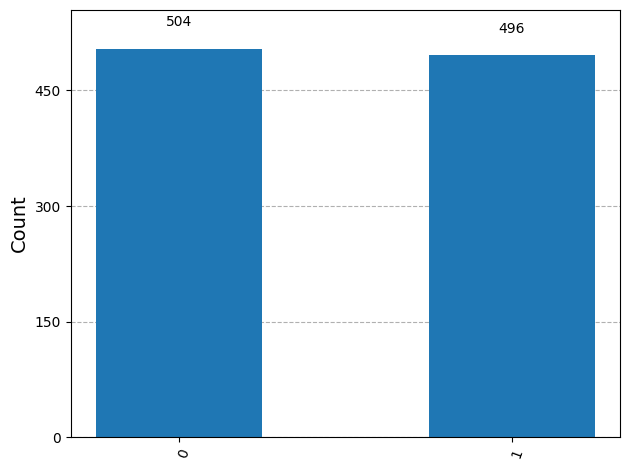

In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator

qc = QuantumCircuit(1, 1)
qc.h(0)
qc.measure(0,0)

#Exécution
sim = AerSimulator()
compiled_circuit = transpile(qc, sim)
result = sim.run(compiled_circuit, shots=1000).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)